In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import pickle
from sklearn.neural_network import MLPClassifier

In [ ]:
def wordSplit(rev, stop_words = stopwords.words('english')):
    s = [item for sublist in [f.lower().split() for f in re.findall('\d+|\D+',rev.lower())] for item in sublist]
    s = [x for x in s if x not in stop_words]
    
    return s

In [ ]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews_FakeClassified.csv")
Hotel_Reviews_Filtered=Hotel_Reviews[(Hotel_Reviews.lat.notnull() | Hotel_Reviews.lng.notnull())]

In [ ]:
Hotel_Reviews_Filtered=Hotel_Reviews_Filtered.sample(frac=1)

In [ ]:
allReviews= Hotel_Reviews_Filtered['Positive_Review']+Hotel_Reviews_Filtered['Negative_Review']

In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),tokenizer=wordSplit, lowercase=True).fit(allReviews)
featureMatrix = tfidf.transform(allReviews)

In [ ]:
y=Hotel_Reviews_Filtered["Authentic"]

In [ ]:
train, test, train_labels, test_labels = train_test_split(featureMatrix,y,test_size=.20,random_state=42)

In [ ]:
pickle_out1=open('train_fs.pickle','wb')
pickle.dump(train,pickle_out1)
pickle_out1.close()

pickle_out2=open('test_fs.pickle','wb')
pickle.dump(test,pickle_out2)
pickle_out2.close()

pickle_out3=open('train_labels_fs.pickle','wb')
pickle.dump(train_labels,pickle_out3)
pickle_out3.close()

pickle_out4=open('test_labels_fs.pickle','wb')
pickle.dump(test_labels,pickle_out4)
pickle_out4.close()

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our model with 500 trees
rf = RandomForestClassifier(n_estimators=500, oob_score=True)

# Fit our model to training data
rf = rf.fit(train, train_labels)

In [12]:
predicted_test = rf.predict(test)

In [13]:
actual_test=np.array(test_labels)

In [14]:
accuracy=1-sum(abs(predicted_test-actual_test))/actual_test.size

In [15]:
accuracy*100

88.149999999999991

In [16]:
result=confusion_matrix(predicted_test,test_labels)

In [4]:
result

array([[ 225,   41],
       [1144, 8590]])

In [5]:
result= result/ result.astype(np.float).sum(axis=0)

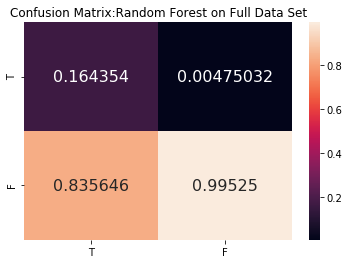

In [7]:
import seaborn as sn
df_cm=pd.DataFrame(result,['T', 'F'],['T','F'])
sn.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt='g')
#plt.xlabel('Deviation From Actual')
#ylabel='Actual'
plt.title('Confusion Matrix:Random Forest on Full Data Set')
plt.show()